LAB TASK 1

Missing values:
 0

Dataset shape: (569, 31)
        diagnosis   feature_1   feature_2   feature_3    feature_4  \
count  569.000000  569.000000  569.000000  569.000000   569.000000   
mean     0.372583   14.127292   19.289649   91.969033   654.889104   
std      0.483918    3.524049    4.301036   24.298981   351.914129   
min      0.000000    6.981000    9.710000   43.790000   143.500000   
25%      0.000000   11.700000   16.170000   75.170000   420.300000   
50%      0.000000   13.370000   18.840000   86.240000   551.100000   
75%      1.000000   15.780000   21.800000  104.100000   782.700000   
max      1.000000   28.110000   39.280000  188.500000  2501.000000   

        feature_5   feature_6   feature_7   feature_8   feature_9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.01938

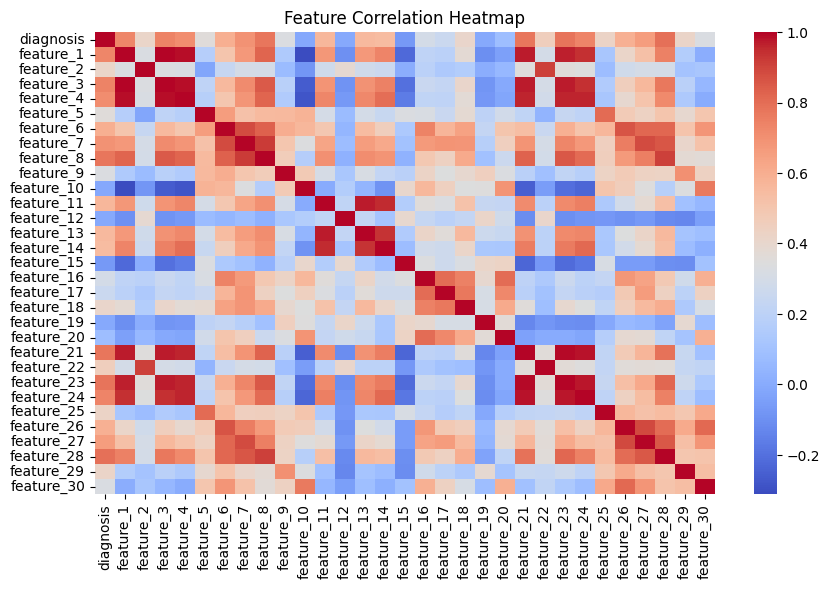


===== PERFORMANCE RESULTS (Table 1 Style) =====
Model                                                                                                                                                                  Training Phase                                                                                                                                                                    Testing Phase
  KNN {'Accuracy (%)': 97.8, 'Sensitivity (%)': 94.71, 'Specificity (%)': 99.65, 'G-Mean (%)': 97.15, 'False Discovery Rate (%)': 0.62, 'False Omission Rate (%)': 3.07, 'MCC': 0.95} {'Accuracy (%)': 95.61, 'Sensitivity (%)': 90.48, 'Specificity (%)': 98.61, 'G-Mean (%)': 94.46, 'False Discovery Rate (%)': 2.56, 'False Omission Rate (%)': 5.33, 'MCC': 0.91}
  SVM {'Accuracy (%)': 98.68, 'Sensitivity (%)': 96.47, 'Specificity (%)': 100.0, 'G-Mean (%)': 98.22, 'False Discovery Rate (%)': 0.0, 'False Omission Rate (%)': 2.06, 'MCC': 0.97}   {'Accuracy (%)': 97.37, 'Sensitivity (%)': 92.86,

C:\Users\dania\AppData\Local\Temp\ipykernel_29192\274666334.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['KNN', 'SVM'],


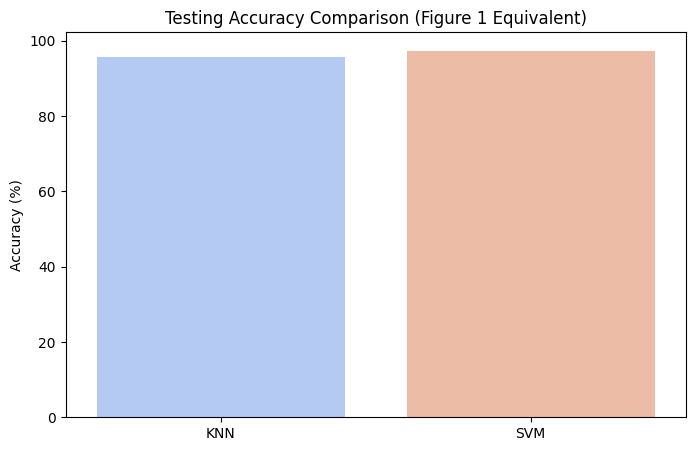

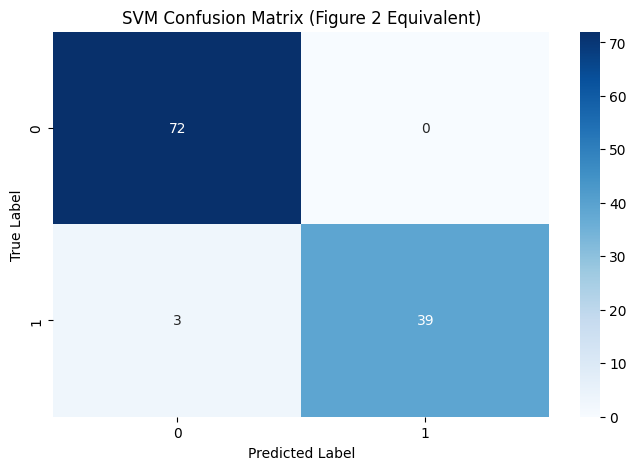

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
cols = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=cols)


data.drop('id', axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Malignant=1, Benign=0

print("Missing values:\n", data.isnull().sum().sum())

print("\nDataset shape:", data.shape)
print(data.describe())


plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)


def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()

    accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
    sensitivity = TP / (TP + FN) * 100   # Recall
    specificity = TN / (TN + FP) * 100
    gmean = np.sqrt(sensitivity * specificity)
    fdr = FP / (FP + TP) * 100
    forate = FN / (FN + TN) * 100
    mcc = matthews_corrcoef(y_true, y_pred)

    return {
        'Accuracy (%)': round(accuracy, 2),
        'Sensitivity (%)': round(sensitivity, 2),
        'Specificity (%)': round(specificity, 2),
        'G-Mean (%)': round(gmean, 2),
        'False Discovery Rate (%)': round(fdr, 2),
        'False Omission Rate (%)': round(forate, 2),
        'MCC': round(mcc, 2)
    }

results = pd.DataFrame({
    'Model': ['KNN', 'SVM'],
    'Training Phase': [evaluate_model(y_train, knn.predict(X_train)),
                       evaluate_model(y_train, svm.predict(X_train))],
    'Testing Phase': [evaluate_model(y_test, knn.predict(X_test)),
                      evaluate_model(y_test, svm.predict(X_test))]
})

print("\n===== PERFORMANCE RESULTS (Table 1 Style) =====")
print(results.to_string(index=False))


plt.figure(figsize=(8,5))
sns.barplot(x=['KNN', 'SVM'],
            y=[accuracy_score(y_test, knn.predict(X_test))*100,
               accuracy_score(y_test, svm.predict(X_test))*100],
            palette='coolwarm')
plt.title("Testing Accuracy Comparison (Figure 1 Equivalent)")
plt.ylabel("Accuracy (%)")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix (Figure 2 Equivalent)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


LAB TASK 2

Dataset Shape: (569, 32)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null   

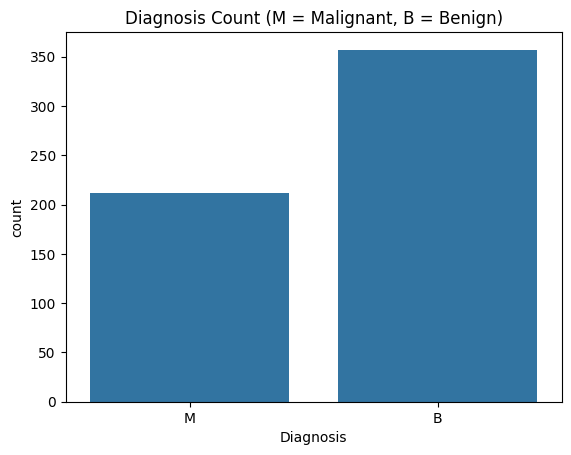

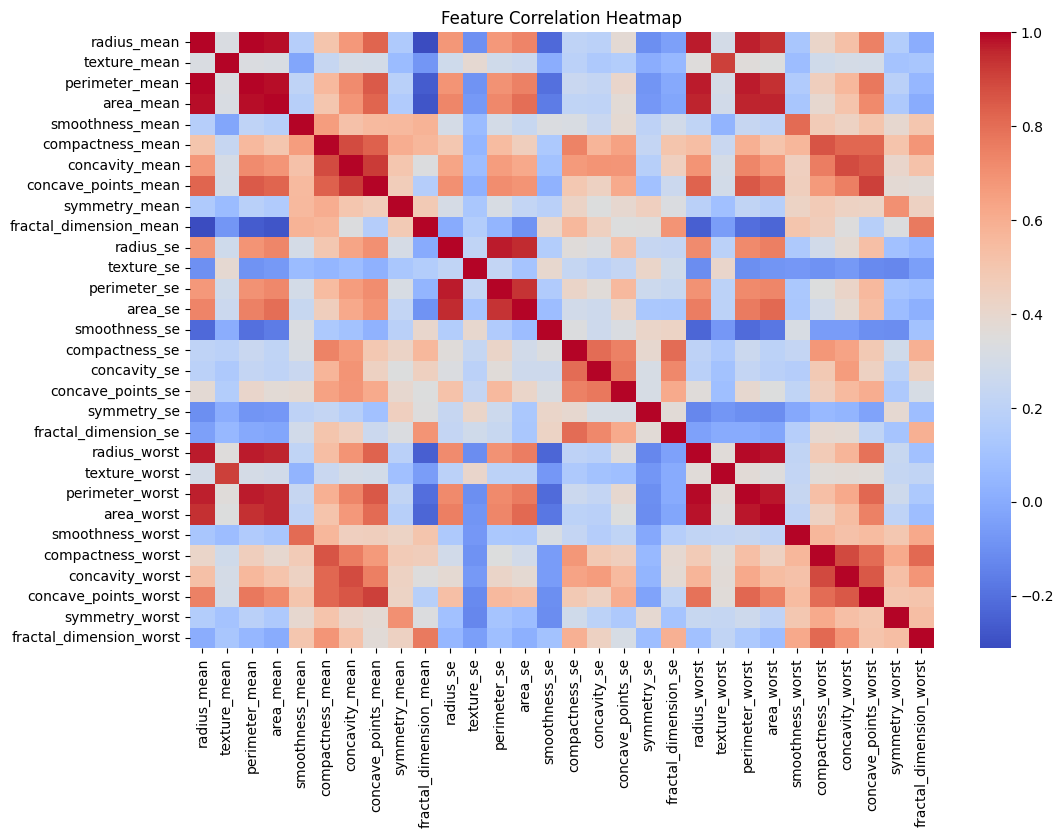


Duplicate records: 0

Kernel: linear
Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Kernel: poly
Accuracy: 0.868421052631579
              precision    recall  f1-score   support

           0       0.83      1.00      0.90        71
           1       1.00      0.65      0.79        43

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114


Kernel: rbf
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                    

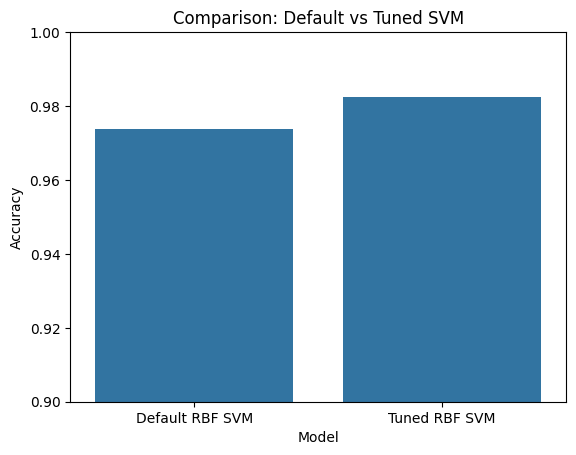

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv("wdbc.data", header=None)
columns = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
            'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
            'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
            'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
            'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
            'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
            'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data.columns = columns


print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum().sum())


print("\nSummary Statistics:\n", data.describe())


sns.countplot(data=data, x='Diagnosis')
plt.title("Diagnosis Count (M = Malignant, B = Benign)")
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(data.iloc[:, 2:].corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})


data = data.drop(columns=['ID'])


print("\nDuplicate records:", data.duplicated().sum())
data = data.drop_duplicates()


X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[kernel] = acc
    print(f"\nKernel: {kernel}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))


param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best)

print("\nTuned SVM Performance:")
print("Accuracy:", best_acc)
print(classification_report(y_test, y_pred_best))


default_svm = SVC(kernel='rbf')
default_svm.fit(X_train, y_train)
y_pred_default = default_svm.predict(X_test)
default_acc = accuracy_score(y_test, y_pred_default)

comparison = pd.DataFrame({
    'Model': ['Default RBF SVM', 'Tuned RBF SVM'],
    'Accuracy': [default_acc, best_acc]
})

sns.barplot(x='Model', y='Accuracy', data=comparison)
plt.title("Comparison: Default vs Tuned SVM")
plt.ylim(0.9, 1)
plt.show()


LAB TASK 3

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

columns = ['ID','Diagnosis'] + [f'Feature_{i}' for i in range(1,31)]
data = pd.read_csv('wdbc.data', header=None, names=columns)
data = data.drop('ID', axis=1)
data['Diagnosis'] = LabelEncoder().fit_transform(data['Diagnosis'])
print(data.info(), data.isnull().sum().sum(), data.describe())

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = ['linear','poly','rbf','sigmoid']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    print(k, 'Accuracy:', accuracy_score(y_test, model.predict(X_test)))

model_default = SVC()
model_tuned = SVC(C=2, gamma=0.1, kernel='rbf')
model_default.fit(X_train, y_train)
model_tuned.fit(X_train, y_train)
print('Default Params:', accuracy_score(y_test, model_default.predict(X_test)))
print('Tuned Params:', accuracy_score(y_test, model_tuned.predict(X_test)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Diagnosis   569 non-null    int64  
 1   Feature_1   569 non-null    float64
 2   Feature_2   569 non-null    float64
 3   Feature_3   569 non-null    float64
 4   Feature_4   569 non-null    float64
 5   Feature_5   569 non-null    float64
 6   Feature_6   569 non-null    float64
 7   Feature_7   569 non-null    float64
 8   Feature_8   569 non-null    float64
 9   Feature_9   569 non-null    float64
 10  Feature_10  569 non-null    float64
 11  Feature_11  569 non-null    float64
 12  Feature_12  569 non-null    float64
 13  Feature_13  569 non-null    float64
 14  Feature_14  569 non-null    float64
 15  Feature_15  569 non-null    float64
 16  Feature_16  569 non-null    float64
 17  Feature_17  569 non-null    float64
 18  Feature_18  569 non-null    float64
 19  Feature_19  569 non-null    f